In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('country_wise_latest.csv')
df.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [3]:
df.shape

(187, 15)

**We have 187 rows and 15 features**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

**No missing Values**

In [5]:
df.columns

Index(['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered',
       'Confirmed last week', '1 week change', '1 week % increase',
       'WHO Region'],
      dtype='object')

## The top 10 countries with the most confirmed cases

In [61]:
df.nlargest(10,'Confirmed')[['Country/Region','Confirmed']]

,Country/Region,Confirmed
173,US,4290259
23,Brazil,2442375
79,India,1480073
138,Russia,816680
154,South Africa,452529
111,Mexico,395489
132,Peru,389717
35,Chile,347923
177,United Kingdom,301708
81,Iran,293606


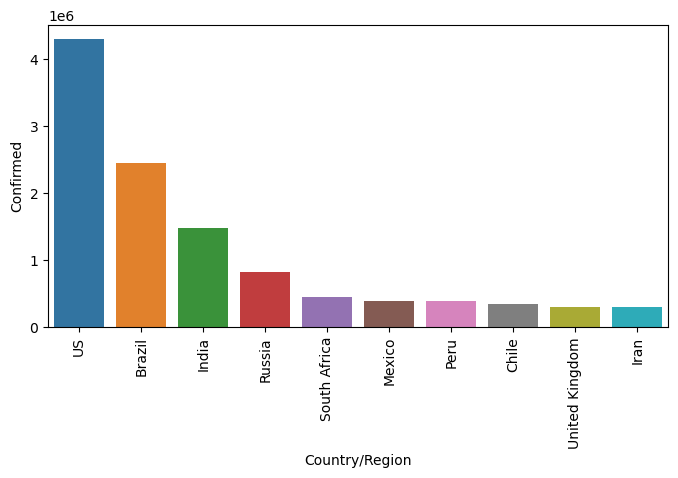

In [119]:
plt.figure(figsize=(8,4),dpi=100)
sns.barplot(x='Country/Region', y='Confirmed', data=df.nlargest(10,'Confirmed'))
plt.xticks(rotation=90);

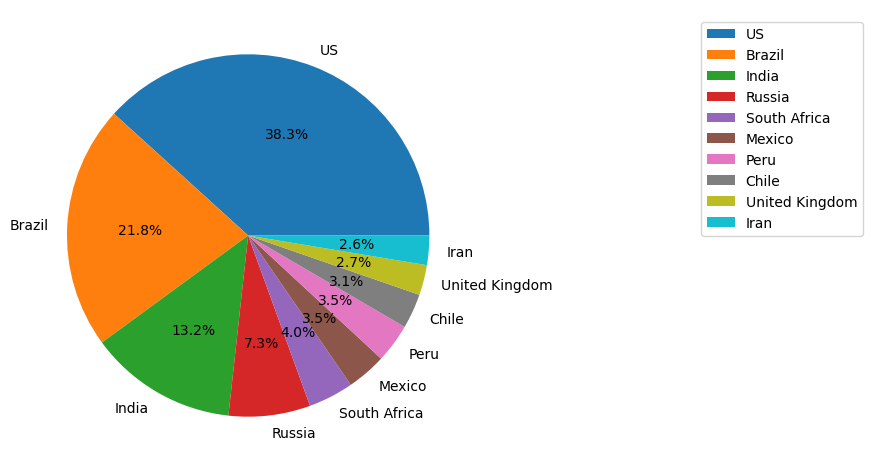

In [125]:
plt.figure(figsize=(8,6),dpi=100)
plt.pie(data=df.nlargest(10,'Confirmed')[['Country/Region','Confirmed']], x='Confirmed', labels='Country/Region', autopct='%1.1f%%');
plt.legend(loc=(1.5,0.5))

In [ ]:
sns.scatterplot(palette=)

## The top 10 countries with the least amount of confirmed cases of corona virus

In [81]:
df.nsmallest(10,'Confirmed')[['Country/Region','Confirmed']]

,Country/Region,Confirmed
183,Western Sahara,10
75,Holy See,12
68,Greenland,14
140,Saint Kitts and Nevis,17
49,Dominica,18
94,Laos,20
69,Grenada,23
141,Saint Lucia,24
168,Timor-Leste,24
59,Fiji,27


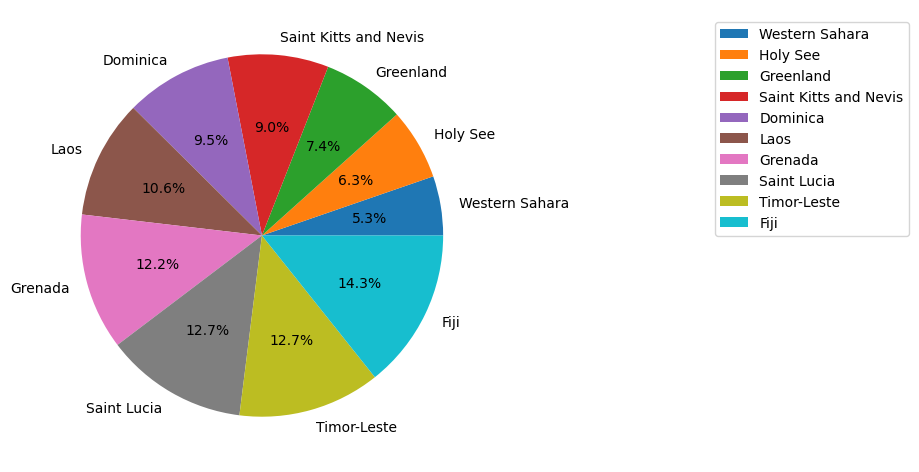

In [120]:
plt.figure(figsize=(8,6),dpi=100)
plt.pie(data=df.nsmallest(10,'Confirmed')[['Country/Region','Confirmed']], x='Confirmed', labels='Country/Region', autopct='%1.1f%%');
plt.legend(loc=(1.5,0.5))

## The top 10 countries with the highest death cases 

In [82]:
df.nlargest(10,'Deaths')[['Country/Region','Deaths']]

,Country/Region,Deaths
173,US,148011
23,Brazil,87618
177,United Kingdom,45844
111,Mexico,44022
85,Italy,35112
79,India,33408
61,France,30212
157,Spain,28432
132,Peru,18418
81,Iran,15912


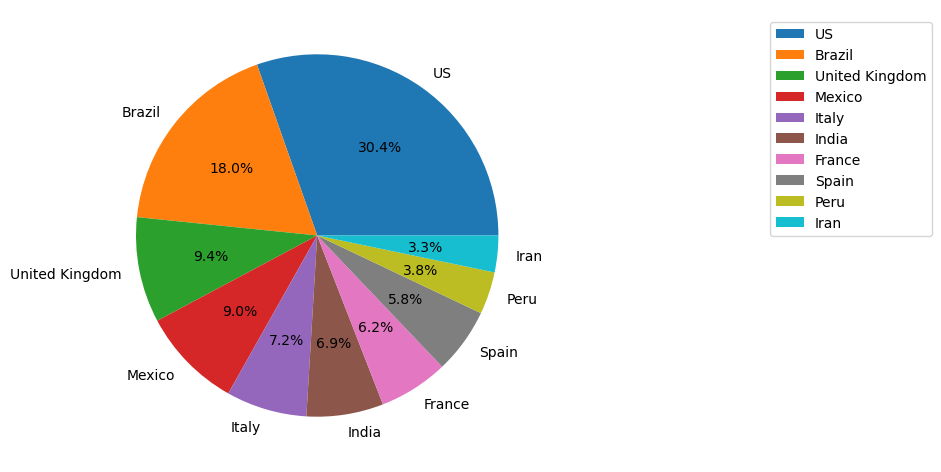

In [127]:
plt.figure(figsize=(8,6),dpi=100)
plt.pie(data=df.nlargest(10,'Deaths')[['Country/Region','Deaths']], x='Deaths', labels='Country/Region', autopct='%1.1f%%');
plt.legend(loc=(1.5,0.5))

## Top ten highest recovered Cases

In [84]:
df.nlargest(10,'Recovered')[['Country/Region','Recovered']]

,Country/Region,Recovered
23,Brazil,1846641
173,US,1325804
79,India,951166
138,Russia,602249
35,Chile,319954
111,Mexico,303810
154,South Africa,274925
132,Peru,272547
81,Iran,255144
128,Pakistan,241026


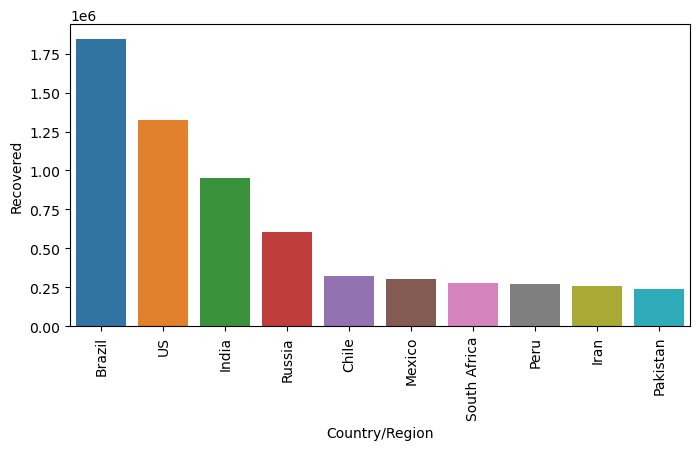

In [131]:
plt.figure(figsize=(8,4),dpi=100)
sns.barplot(x='Country/Region', y='Recovered', data=df.nlargest(10,'Recovered'))
plt.xticks(rotation=90);

In [16]:
df['WHO Region'].value_counts()

Europe                   56
Africa                   48
Americas                 35
Eastern Mediterranean    22
Western Pacific          16
South-East Asia          10
Name: WHO Region, dtype: int64

In [26]:
data=df.groupby('WHO Region').mean().sort_values('Deaths', ascending=False).reset_index()

In [35]:
data

,WHO Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
0,Americas,252551.028571,9792.342857,127674.742857,115083.942857,3700.885714,101.571429,2707.885714,3.052571,62.291429,inf,223291.371429,29259.657143,16.331143
1,South-East Asia,183529.700000,4134.900000,115693.300000,63701.500000,4899.300000,73.400000,3758.200000,1.296000,66.704000,1.9560,147828.300000,35701.400000,8.513000
2,Europe,58920.053571,3770.428571,35602.196429,19547.428571,398.107143,5.428571,209.500000,4.198393,68.635000,inf,56193.142857,2726.910714,7.769643
3,Eastern Mediterranean,67761.090909,1742.681818,54609.090909,11409.318182,564.090909,20.227273,674.681818,3.563182,66.593182,inf,63583.954545,4177.136364,10.482273
4,Western Pacific,18276.750000,515.562500,12923.125000,4838.062500,205.562500,1.500000,70.437500,1.290000,76.805000,1.7875,16647.437500,1629.312500,22.111250
5,Africa,15066.812500,254.645833,9180.104167,5632.062500,253.666667,7.354167,303.395833,2.306458,57.014792,inf,12669.166667,2397.645833,18.086458


### observation

.Africa has the least amount of death cases

Americas have the highest amount of death cases

.US has the highest confirmed cases

Western Sahara hs the least amount of confirmed cases

US has the highest death cases

Brazil has the highest recovered cases



<AxesSubplot:xlabel='WHO Region', ylabel='Deaths'>

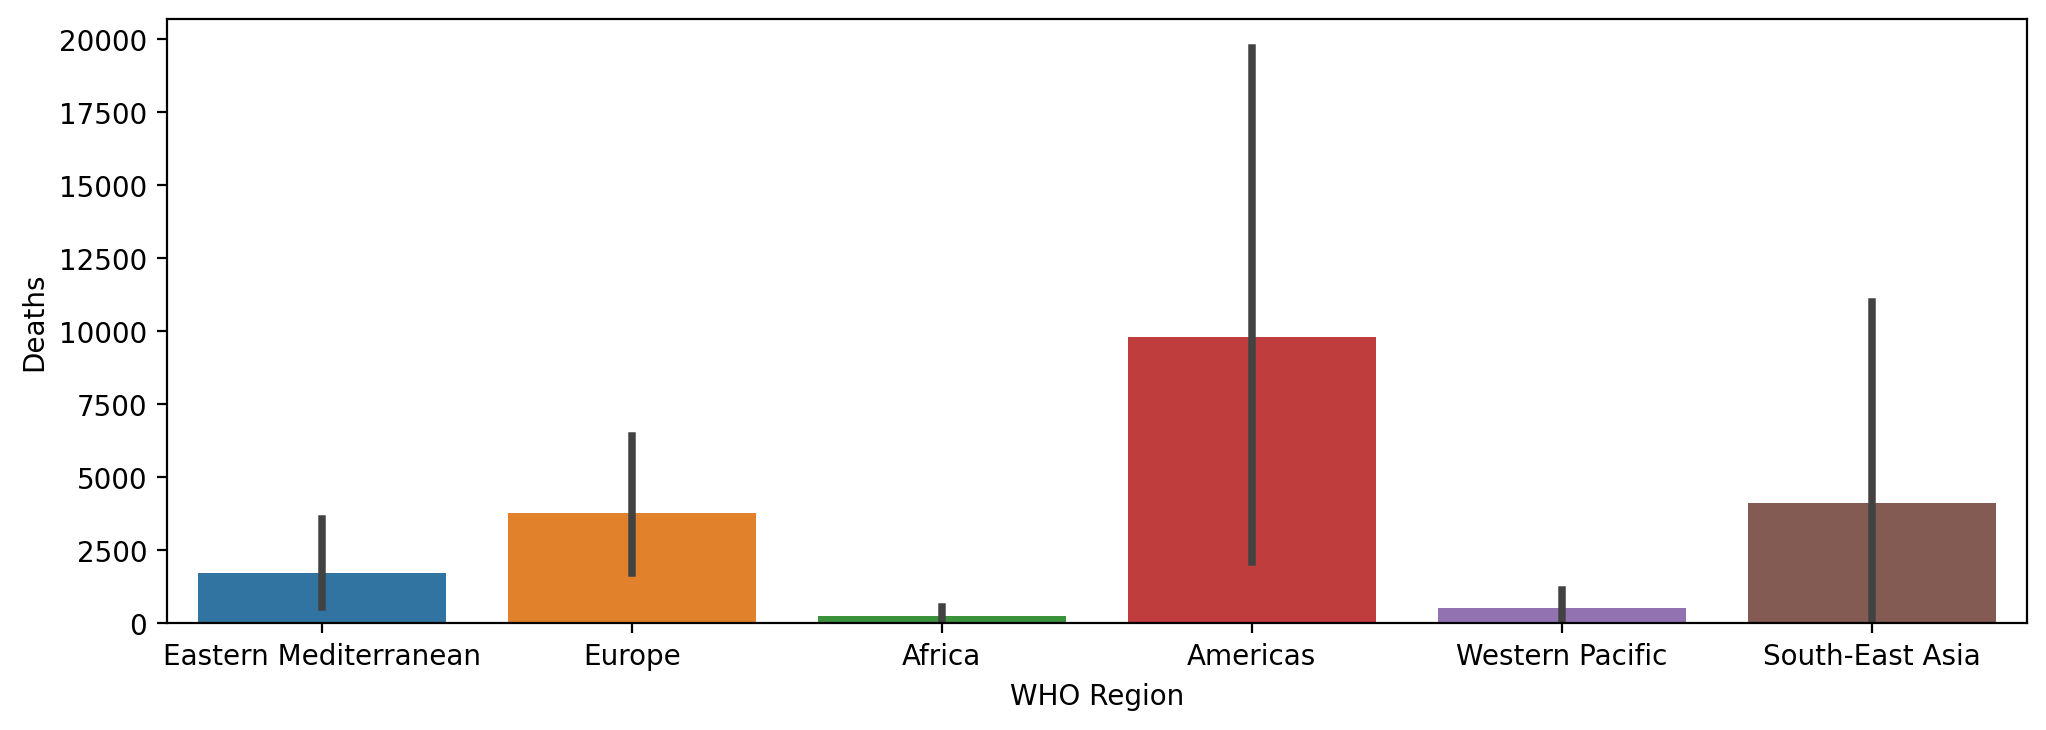

In [41]:
plt.figure(figsize=(12,4), dpi=200)

sns.barplot(x='WHO Region',data=df, y='Deaths')

In [53]:
df[df['Country/Region']=='Nigeria']

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
124,Nigeria,41180,860,18203,22117,648,2,829,2.09,44.2,4.72,37225,3955,10.62,Africa


In [57]:
22117/41180 *100

53.70811073336571

In [51]:
df.describe()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
count,1.870000e+02,187.000000,1.870000e+02,1.870000e+02,187.000000,187.000000,187.000000,187.000000,187.000000,187.00,1.870000e+02,187.000000,187.000000
mean,8.813094e+04,3497.518717,5.063148e+04,3.400194e+04,1222.957219,28.957219,933.812834,3.019519,64.820535,inf,7.868248e+04,9448.459893,13.606203
std,3.833187e+05,14100.002482,1.901882e+05,2.133262e+05,5710.374790,120.037173,4197.719635,3.454302,26.287694,NaN,3.382737e+05,47491.127684,24.509838
min,1.000000e+01,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,1.000000e+01,-47.000000,-3.840000
25%,1.114000e+03,18.500000,6.265000e+02,1.415000e+02,4.000000,0.000000,0.000000,0.945000,48.770000,1.45,1.051500e+03,49.000000,2.775000
50%,5.059000e+03,108.000000,2.815000e+03,1.600000e+03,49.000000,1.000000,22.000000,2.150000,71.320000,3.62,5.020000e+03,432.000000,6.890000
75%,4.046050e+04,734.000000,2.260600e+04,9.149000e+03,419.500000,6.000000,221.000000,3.875000,86.885000,6.44,3.708050e+04,3172.000000,16.855000
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,56336.000000,1076.000000,33728.000000,28.560000,100.000000,inf,3.834677e+06,455582.000000,226.320000


In [64]:
df1=pd.read_csv('day_wise.csv')

In [66]:
df1.head()

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13


In [72]:
df1['Date']=pd.to_datetime(df1['Date'])

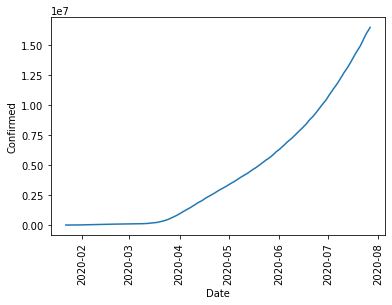

In [80]:
sns.lineplot(x='Date', y='Confirmed',data=df1)
plt.xticks(rotation=90);